In [1]:
#%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#from pylab import figure, show, legend, ylabel

# File to Load (Remember to change these)
city_data_to_load = pd.read_csv("data/city_data.csv")
ride_data_to_load = pd.read_csv("data/ride_data.csv")

# Read the City and Ride Data
city_data = pd.DataFrame(city_data_to_load)
ride_data = pd.DataFrame(ride_data_to_load)

# check size of data files
# print("city: {}" .format(city_data.shape))
# print("ride: {}" .format(ride_data.shape))

# Combine the data into a single dataset
data = pd.merge(ride_data, city_data, how="left", on="city")
# Display the data table for preview
data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [2]:
# print("data: {}" .format(data.shape))

## Bubble Plot of Ride Sharing Data

In [3]:
# Obtain the x and y coordinates for each of the three city types
r_data = data.loc[data["type"] == "Rural"]
u_data = data.loc[data["type"] =="Urban"]
s_data = data.loc[data["type"] =="Suburban"]

In [4]:
rural = pd.DataFrame({"Fare": r_data.groupby("city")["fare"].sum(),
                      "Total Rides": r_data.groupby("city")["ride_id"].count(),
                      "# of Drivers": r_data.groupby("city")["driver_count"].first(),
                      "Type": r_data.groupby("city")["type"].first()
})

urban = pd.DataFrame({"Fare": u_data.groupby("city")["fare"].sum(),
                      "Total Rides": u_data.groupby("city")["ride_id"].count(),
                      "# of Drivers": u_data.groupby("city")["driver_count"].first(),
                      "Type": u_data.groupby("city")["type"].first()})


suburban = pd.DataFrame({"Fare": s_data.groupby("city")["fare"].sum(),
                         "Total Rides": s_data.groupby("city")["ride_id"].count(),
                        "# of Drivers": s_data.groupby("city")["driver_count"].first(),
                        "Type": s_data.groupby("city")["type"].first()})

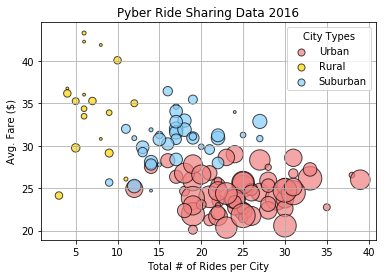

In [11]:
# Build the scatter plots for each city types
# fig, axu=plt.subplots()
xu = urban["Total Rides"]
yu = urban["Fare"]/urban["Total Rides"]
sizeu= (urban["# of Drivers"])*8
urb = plt.scatter(xu, yu, color="lightcoral", edgecolor="black", s=sizeu, alpha=0.7,
label="Urban"
)
#xu.set_xlabel("Total # of Rides per City")
#xu.set_ylabel("Avg. Fare ($)")

#axr = axu.twinx()
#axr = axu.twiny()
xr = rural["Total Rides"]
yr = rural["Fare"]/rural["Total Rides"]
sizer= (rural["# of Drivers"])*8
rur = plt.scatter(xr, yr, color="gold", edgecolor="black", s=sizer, alpha =0.7,
label="Rural"
)

#axs = axu.twinx()
#axs = axu.twiny()
xs = suburban["Total Rides"]
ys = suburban["Fare"]/suburban["Total Rides"]
sizes= (suburban["# of Drivers"])*8
sub = plt.scatter(xs, ys, color="lightskyblue", edgecolor="black", s=sizes, alpha =0.7, label="Suburban"
)

#ax2= axu.twinx()
#ax2.set_ylabel("Note:Circle size correlates to driver count in the city.", rotation = 360)

#ax2.yaxis.set_label_position("right")
#plt.ylabel("Note: Circle size correlates to driver count in the city")

# Incorporate the other graph properties
plt.grid()
plt.title("Pyber Ride Sharing Data 2016")
plt.xlabel("Total # of Rides per City")
plt.ylabel("Avg. Fare ($)")

# Create a legend
# plt.legend(fancybox=True, markerscale =0.5, scatterpoints = 1, fontsize=10)
leg = plt.legend(title="City Types")
leg.legendHandles[0]._sizes = [50]
leg.legendHandles[1]._sizes = [50]
leg.legendHandles[2]._sizes = [50]

# Incorporate a text label regarding circle size

# Save Figure
plt.savefig("BubblePlot-Pyber Ride Sharing.png")


In [6]:
# Show plot
plt.show()

## Total Fares by City Type

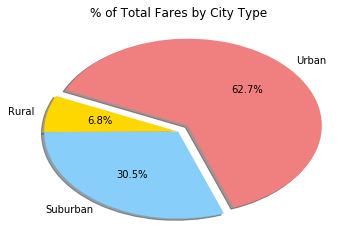

In [7]:
# Calculate Type Percents
tot_rfare = rural["Fare"].sum()
tot_ufare = urban["Fare"].sum()
tot_sfare = suburban["Fare"].sum()
#tot_fare = tot_rfare + tot_ufare + tot_sfare
# Build Pie Chart

fare = [tot_ufare, tot_rfare, tot_sfare]
labels = ["Urban", "Rural", "Suburban"]
color = ["lightcoral", "gold", "lightskyblue"]
explode = [0.1, 0, 0]
plt.pie(fare, colors=color, explode=explode, shadow=True, labels =labels, autopct="%1.1f%%", 
        startangle=290)
plt.title("% of Total Fares by City Type")
#plt.axis("equal")

# Save Figure
plt.savefig("Fares by City Type.png")


In [8]:
# Show Figure
plt.show()

## Total Rides by City Type

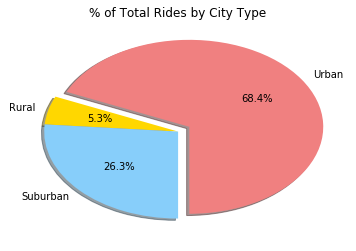

In [9]:
# Calculate Ride Percents
tot_rrides = rural["Total Rides"].sum()
tot_urides = urban["Total Rides"].sum()
tot_srides = suburban["Total Rides"].sum()
# Build Pie Chart
rides = [tot_urides, tot_rrides, tot_srides]
labels = ["Urban", "Rural", "Suburban"]
color = ["lightcoral", "gold", "lightskyblue"]
explode = [0.1, 0, 0]
plt.pie(rides, colors=color, explode=explode, shadow=True, labels =labels, autopct="%1.1f%%", 
        startangle=270)
plt.title("% of Total Rides by City Type")
#plt.axis("equal")

# Save Figure
plt.savefig("Rides by City Type.png")


In [10]:
# Show Figure
plt.show()

## Total Drivers by City Type

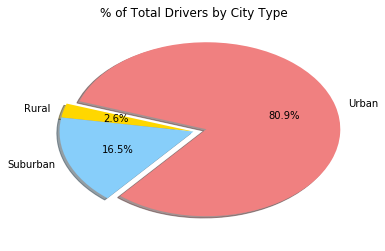

In [11]:
# Calculate Driver Percents
tot_rdrive = rural["# of Drivers"].sum()
tot_udrive = urban["# of Drivers"].sum()
tot_sdrive = suburban["# of Drivers"].sum()

# Build Pie Charts
drivers = [tot_udrive, tot_rdrive, tot_sdrive]
labels = ["Urban", "Rural", "Suburban"]
color = ["lightcoral", "gold", "lightskyblue"]
explode = [0.1, 0, 0]
plt.pie(drivers, colors=color, explode=explode, shadow=True, labels =labels, autopct="%1.1f%%", 
        startangle=230)
plt.title("% of Total Drivers by City Type")

#plt.axis("equal")

# Save Figure
plt.savefig("Drivers by City Type.png")

In [12]:
# Show Figure
plt.show()

# Ride sharing is most popular in the Urban cities and the average fare even in cities that have fewer drivers is not more than thirty dollars
# The average fare of rides in rural cities can cost over forty dollars. However, this may not only be because of the scarcity of drivers in the rural cities and could be due to distances in rural cities.
# While the suburban city drivers make up only 16.5% of the total they take almost quarter of the total rides. Being a driver in a suburban city is better than being a driver in an urban or rural city.  